In [1]:
import sys
from importlib import reload
import pandas as pd
from sklearn.externals import joblib

DATA_DIR = r"C:\_DATA\experimentation\HC_Default_Risk/"

Load the TCXP library we developed:

In [4]:
sys.path.append( '../py' )
import tcxp

Load previously trained random forest classifier:

In [3]:
rfc = joblib.load( DATA_DIR + 'rfc1.pkl' ) 
type( rfc )

C:\Users\mrestrepo\AppData\Local\Continuum\miniconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


sklearn.ensemble.forest.RandomForestClassifier

Load some test data (wasn't used for training of rfc)

In [ ]:
pd.set_option( 'display.max_columns', 200 )

In [5]:
X_test = pd.read_pickle( DATA_DIR + 'x_test.pkl' ) 
X_test.head(10)

,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,region_population_relative,age,days_employed,...,housetype_mode__terraced_house,wallsmaterial_mode__panel,wallsmaterial_mode__stone_brick,wallsmaterial_mode__block,wallsmaterial_mode__wooden,wallsmaterial_mode__mixed,wallsmaterial_mode__monolithic,wallsmaterial_mode__others,emergencystate_mode__no,emergencystate_mode__yes
sk_id_curr,,,,,,,,,,,,,,,,,,,,,
209219,False,True,0,157500.0,1002726.0,29448.0,837000.0,0.020246,-14599,-330,...,False,False,False,False,False,False,False,False,False,False
103277,False,True,0,180000.0,90000.0,9031.5,90000.0,0.022625,-21777,-2049,...,False,False,True,False,False,False,False,False,True,False
367730,False,True,0,270000.0,264888.0,31563.0,234000.0,0.018634,-12381,-2887,...,False,False,False,False,False,False,False,False,False,False
269470,False,True,0,135000.0,1078200.0,31653.0,900000.0,0.009175,-18887,-3510,...,False,False,True,False,False,False,False,False,True,False
332357,False,True,0,157500.0,234000.0,8950.5,234000.0,0.030755,-20971,365243,...,False,False,False,False,False,False,False,False,False,False
183564,True,False,0,360000.0,1223010.0,51817.5,1125000.0,0.024610,-15737,-1128,...,False,True,False,False,False,False,False,False,True,False
208255,True,False,0,315000.0,1125000.0,32895.0,1125000.0,0.019101,-20627,365243,...,False,False,False,False,False,False,False,False,False,False
157230,False,True,1,135000.0,76410.0,8235.0,67500.0,0.010643,-13678,365243,...,False,False,True,False,False,False,False,False,True,False
426994,False,True,0,112500.0,258709.5,25330.5,234000.0,0.005084,-23630,365243,...,False,False,True,False,False,False,False,False,True,False


Compute explanations for first samples:

In [6]:
tc_exps, p0 = tcxp.rf_explain( rfc, X_test[:1000] ) 

In [8]:
ct = ('red', 'green') 

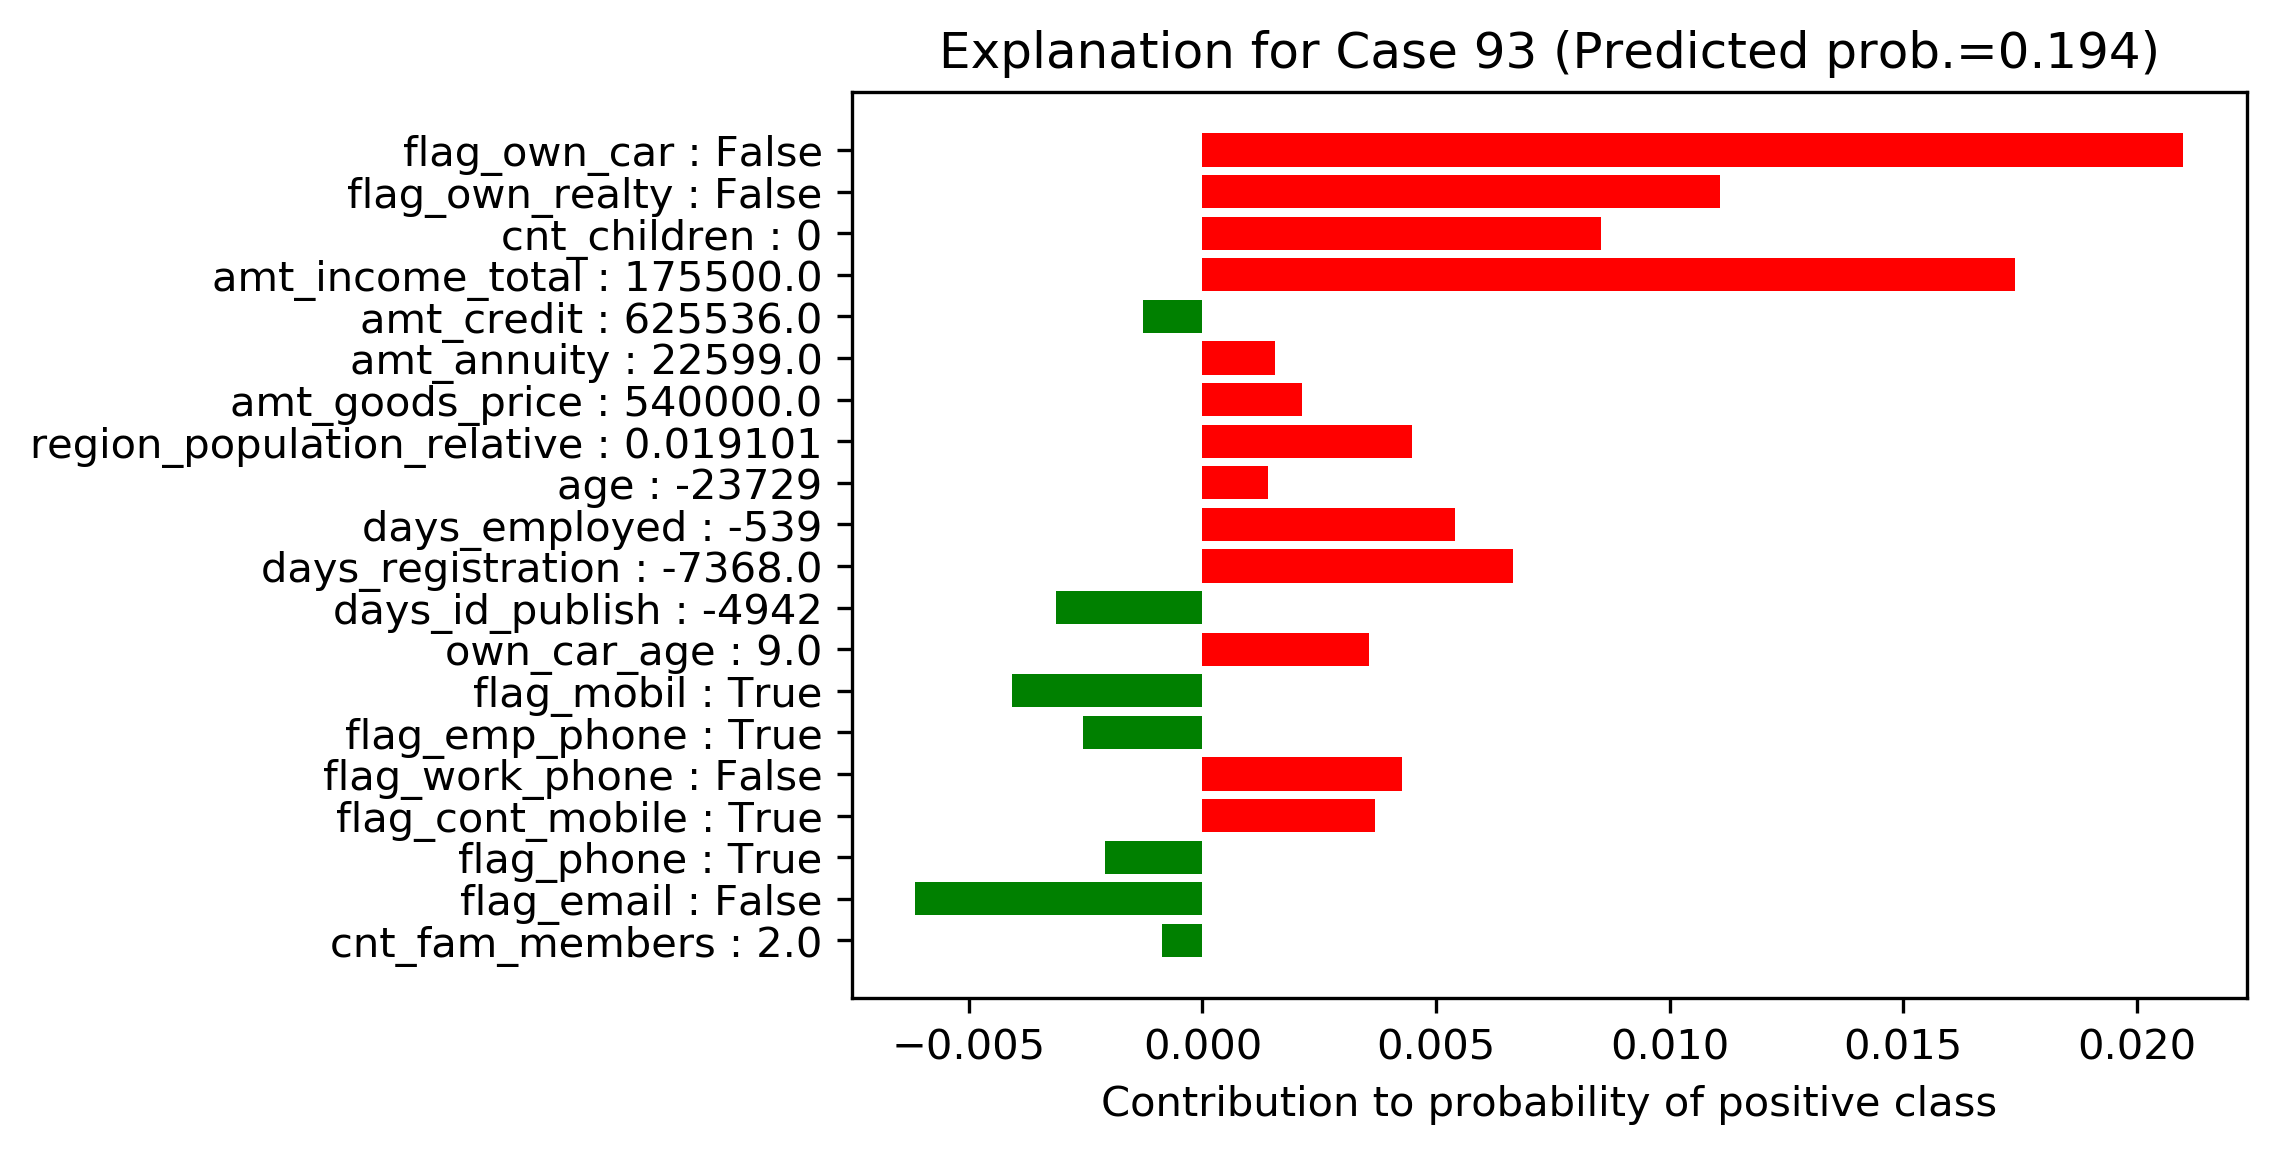

In [12]:
i = 93
_ = tcxp.as_pyplot_figure( tc_exps[i], p0, X_test.columns, X_test.iloc[i,:], 
                           'Case %d' % i, color_theme=ct)

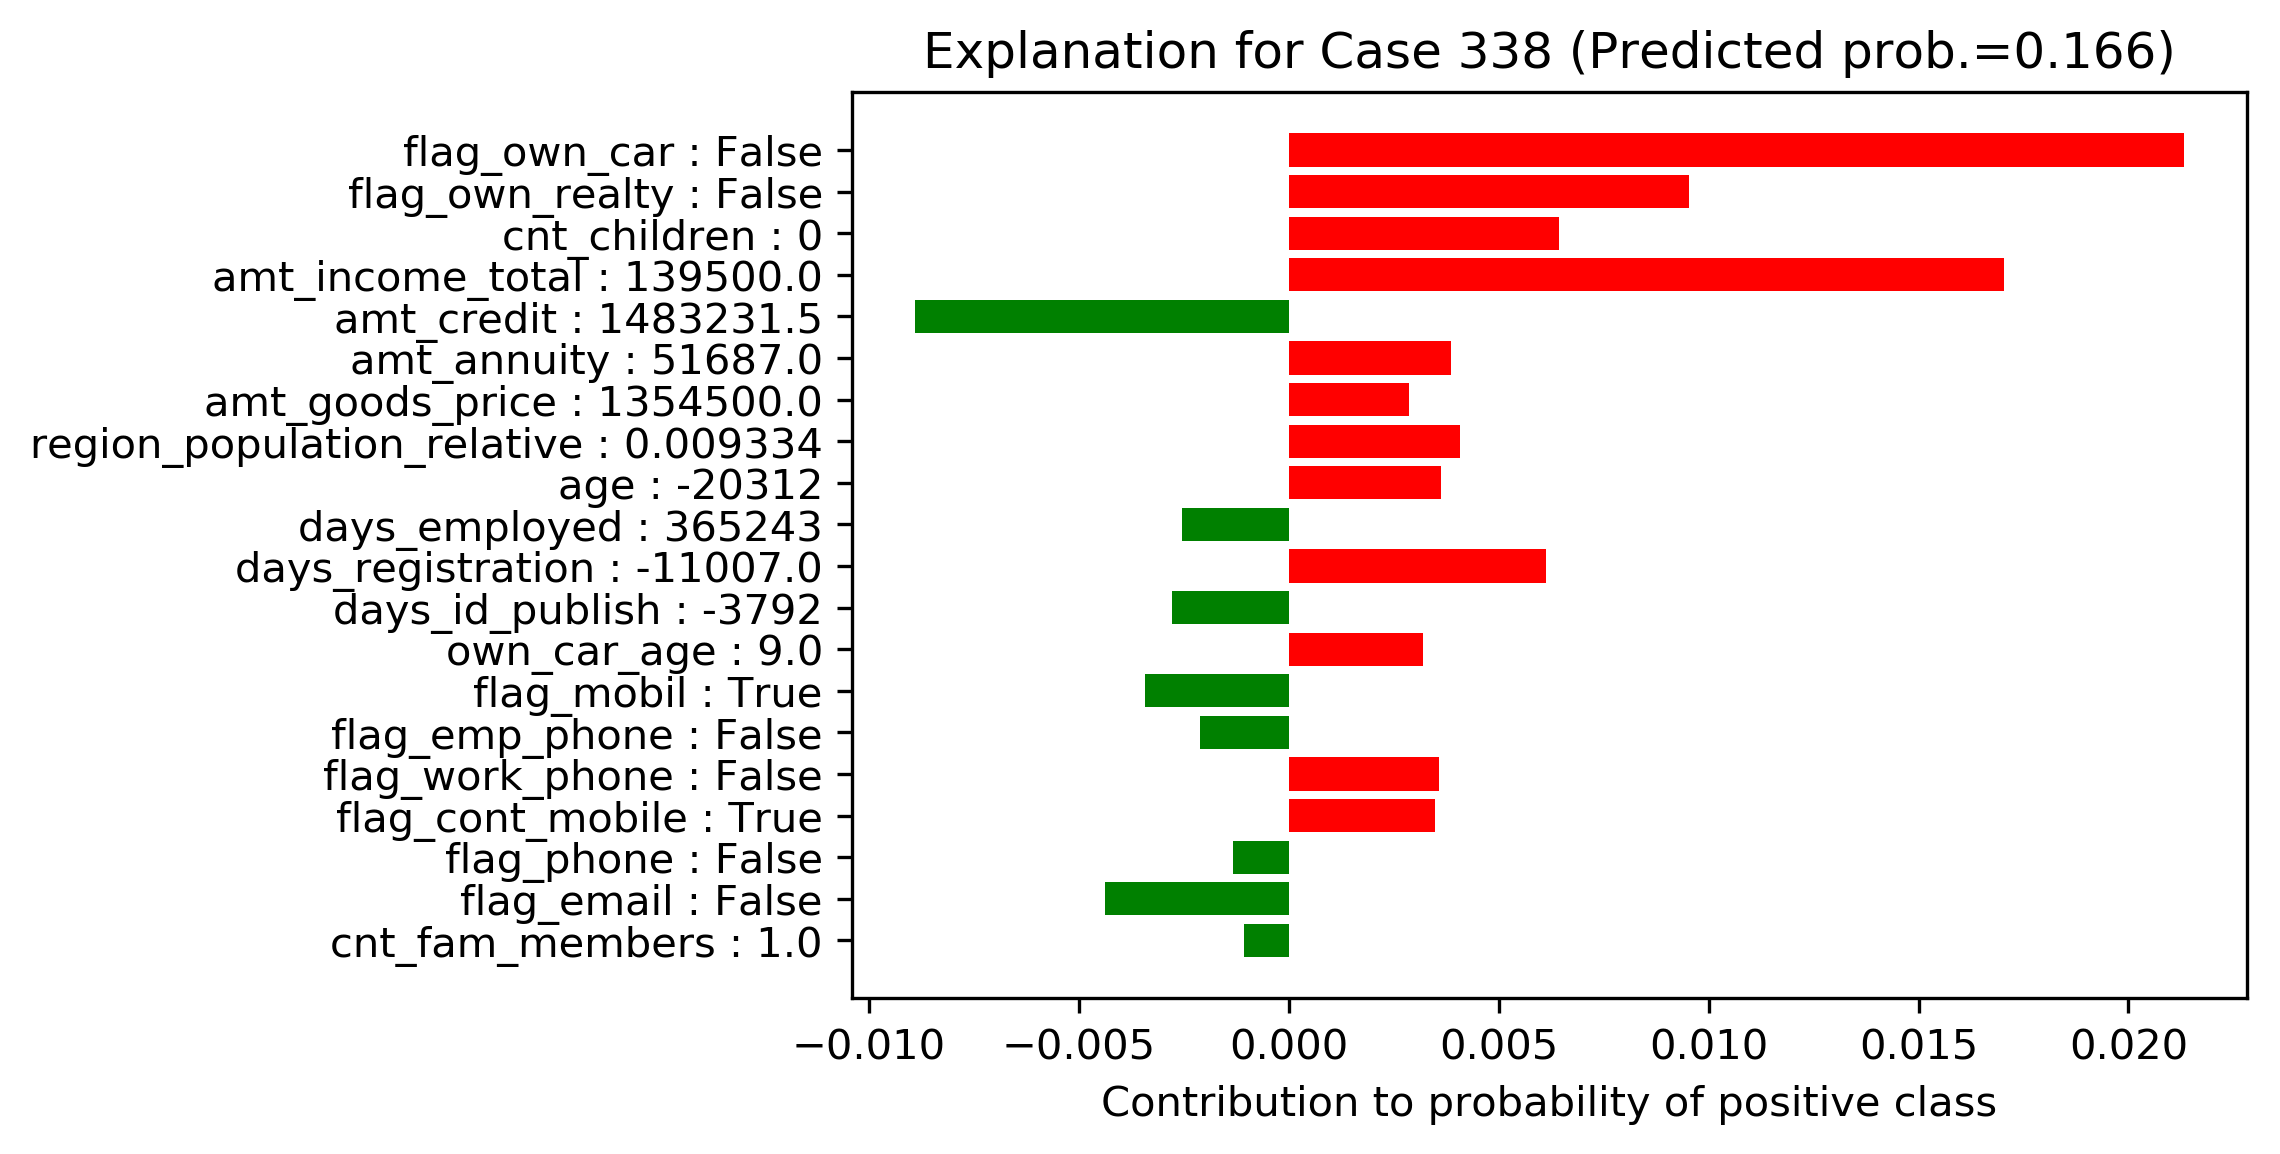

In [33]:
i = 338
_ = tcxp.as_pyplot_figure( tc_exps[i], p0, X_test.columns,  X_test.iloc[i,:], 'Case %d' % i, color_theme=ct)

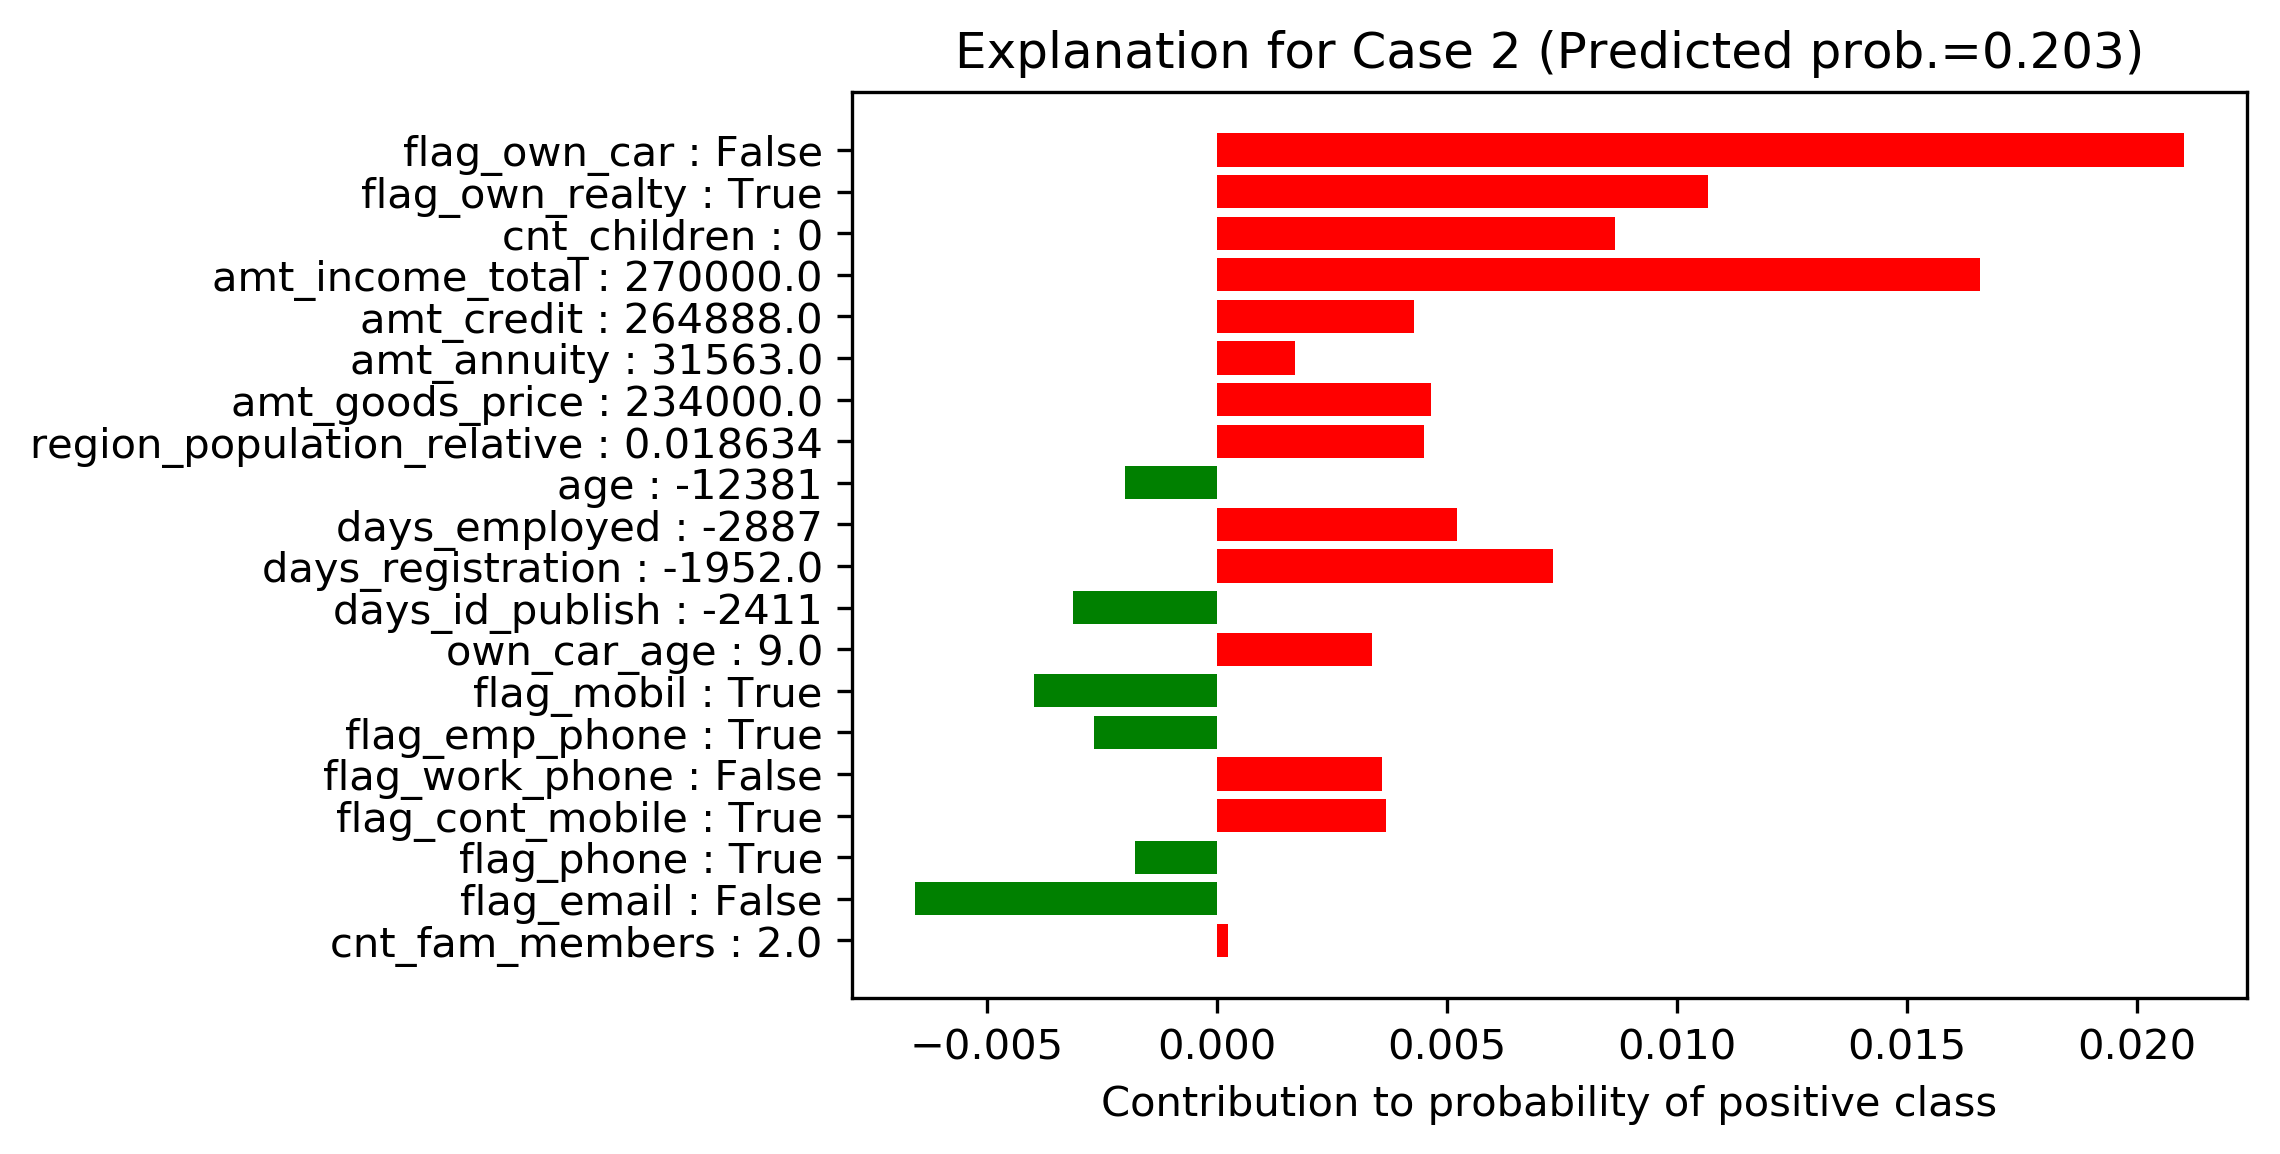

In [11]:
i = 2
_ = tcxp.as_pyplot_figure( tc_exps[i], p0, X_test.columns,  X_test.iloc[i,:], 'Case %d' % i, color_theme=ct)